In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import openpyxl
import os
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/공유용/파이널프로젝트_RAW_210329_210926.xlsx')

In [ ]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [ ]:
df['course_id'].replace('', np.nan, inplace=True)
df['coupon_title'].fillna('사용안함', inplace=True)
df['coupon_discount_amount'].fillna(0.0,inplace=True)
df['sale_price'].replace('', np.nan, inplace=True)
df['pg'].fillna('ETC', inplace=True)
df['subcategory_title'].fillna('해당없음', inplace=True)

df.drop(index=47361, axis=0, inplace=True)
df.dropna(subset=['course_id'], inplace=True)
df.dropna(subset=['sale_price'],inplace=True)

In [ ]:
df.type.value_counts()

PAYMENT    57895
ORDER      37568
REFUND      3637
Name: type, dtype: int64

In [ ]:
df.state.value_counts()

COMPLETED    59154
CANCELLED    38704
PENDING       1065
DELETED        164
REQUESTED       13
Name: state, dtype: int64

In [ ]:
df.category_title.value_counts()

프로그래밍       33109
업무 생산성      12896
데이터사이언스     12632
디자인         11989
영상/3D       10248
마케팅          9319
부동산/금융       5287
투자/재테크       2501
크리에이티브        911
교육            128
지식콘텐츠          56
비즈니스           12
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64

In [ ]:
df.format.value_counts()

올인원        82181
RED         6253
온라인 완주반     3815
하루10분컷      2978
스쿨 온라인      1057
스쿨           957
B2B          763
B2G          591
이벤트          193
B2B 온라인      132
아카이브          72
MBA           56
캠프            48
관리             2
콜로소            2
Name: format, dtype: int64

In [ ]:
df.subcategory_title.value_counts()

해당없음         13542
영상 편집         7307
백엔드 개발        6143
개발자 커리어       5917
프론트엔드 개발      5877
딥러닝/인공지능      4589
데이터분석         4300
PPT/보고서       4150
디자인툴          4050
모바일앱          3724
엑셀/VBA        3590
글쓰기/카피라이팅     3524
일러스트          3238
UX/UI         2774
데이터마케팅        2306
DevOps        2135
금융/투자 실무      2074
모션그래픽         2033
머신러닝          1958
회계/재무/세무      1945
시각디자인         1927
주식 투자         1787
디지털마케팅        1754
게임            1707
SNS마케팅        1185
부동산 개발        1174
업무자동화          996
코딩 입문          782
부동산 투자         714
VFX            523
리더십            511
게임 그래픽         385
데이터엔지니어링       275
커뮤니케이션         204
Name: subcategory_title, dtype: int64

In [ ]:
# 정부기관 B2G / 기업.대학 B2B
B2G = df[df.format=="B2G"].reset_index(drop=True)
B2B_temp = df[df.format=="B2B"]
B2B_on = df[df.format=="B2B 온라인"]
B2B = pd.concat([B2B_temp,B2B_on]).reset_index(drop=True)

In [ ]:
#데이터 사이언스 -> 데이터사이언스
df.loc[(df.category_title=='데이터 사이언스'),'category_title']= '데이터사이언스'

In [ ]:
df.category_title.value_counts()

프로그래밍      33109
업무 생산성     12896
데이터사이언스    12641
디자인        11989
영상/3D      10248
마케팅         9319
부동산/금융      5287
투자/재테크      2501
크리에이티브       911
교육           128
지식콘텐츠         56
비즈니스          12
관리             2
일러스트           1
Name: category_title, dtype: int64

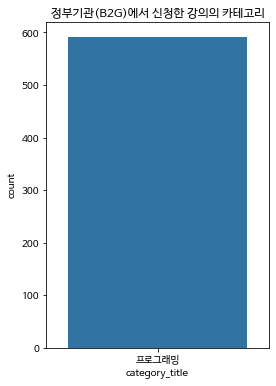

In [ ]:
plt.figure(figsize=(4,6))
plt.title("정부기관(B2G)에서 신청한 강의의 카테고리")
sns.countplot(data=B2G, x='category_title')
plt.show()

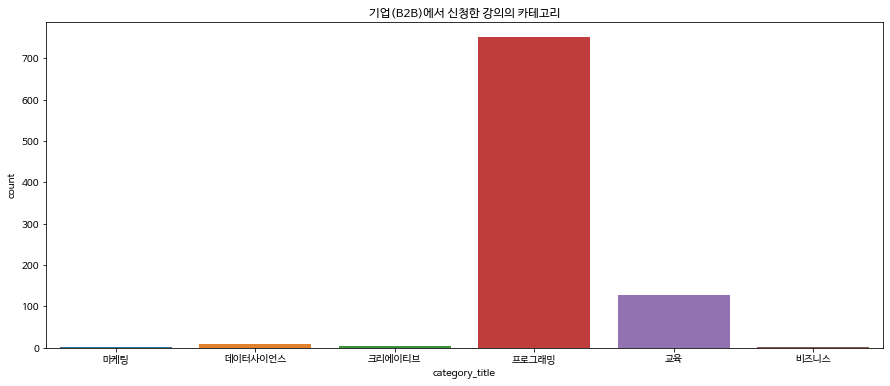

In [ ]:
plt.figure(figsize=(15,6))
plt.title("기업(B2B)에서 신청한 강의의 카테고리")
sns.countplot(data=B2B, x='category_title')
plt.show()

In [ ]:
df.sale_price.value_counts()

149000.0     2219
99000.0      2178
119000.0     2051
159000.0     2023
100000.0     1995
             ... 
6900000.0       1
152100.0        1
575000.0        1
409810.0        1
352000.0        1
Name: sale_price, Length: 525, dtype: int64

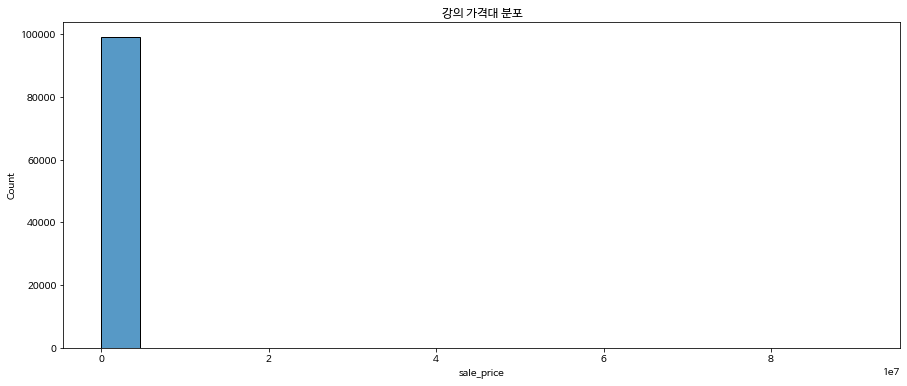

In [ ]:
plt.figure(figsize=(15,6))
plt.title("강의 가격대 분포")
sns.histplot(data=df, x='sale_price', bins=20)
plt.show() #아웃라이어 때문에 결과가 이상하게 나옴. 분석대상 자료의 대부분이 50만원 미만에 분포하고 있음을 확인

In [ ]:
pd.crosstab(index=df.type, columns=df.state)

state,CANCELLED,COMPLETED,DELETED,PENDING,REQUESTED
type,,,,,
ORDER,34123,6036,0,0,0
PAYMENT,7156,52902,217,1144,14
REFUND,0,3822,2,0,0
TRANSACTION,0,3,0,0,0


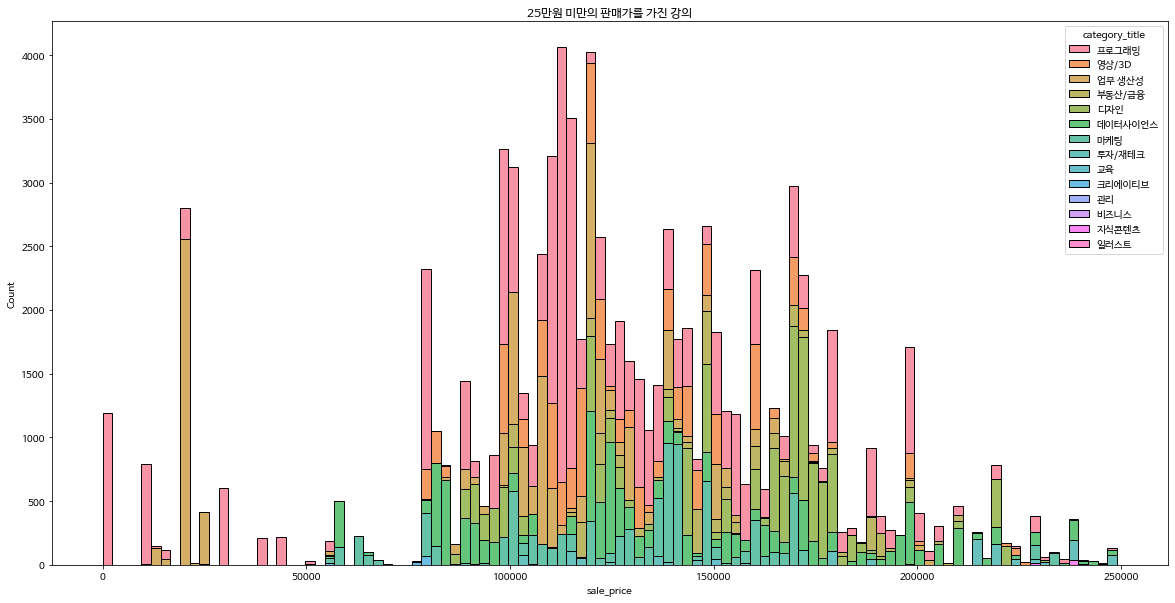

In [ ]:
low_price = df[df.sale_price<250000.0] #판매가격이 25만원 미만
plt.figure(figsize=(20,10))
plt.title("25만원 미만의 판매가를 가진 강의")
sns.histplot(data=low_price, x='sale_price', hue='category_title', multiple='stack')
plt.show()

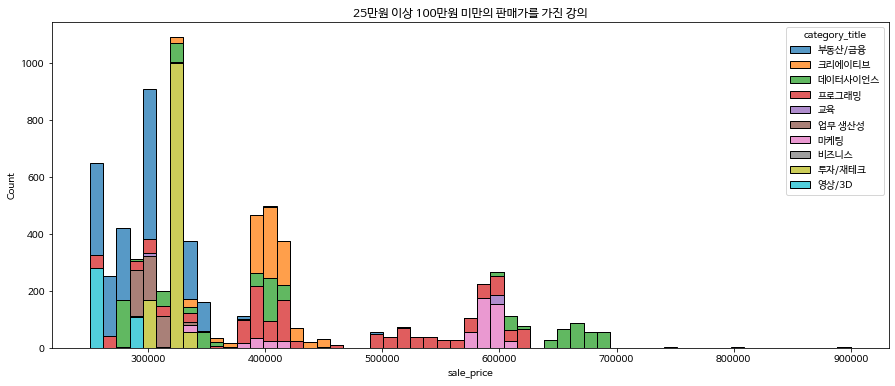

In [ ]:
middle_price = df[df.sale_price>=250000.0][df.sale_price<1000000.0] #판매가격이 25만원 이상 100만원 미만
plt.figure(figsize=(15,6))
plt.title("25만원 이상 100만원 미만의 판매가를 가진 강의")
sns.histplot(data=middle_price, x='sale_price', hue='category_title', multiple='stack')
plt.show()

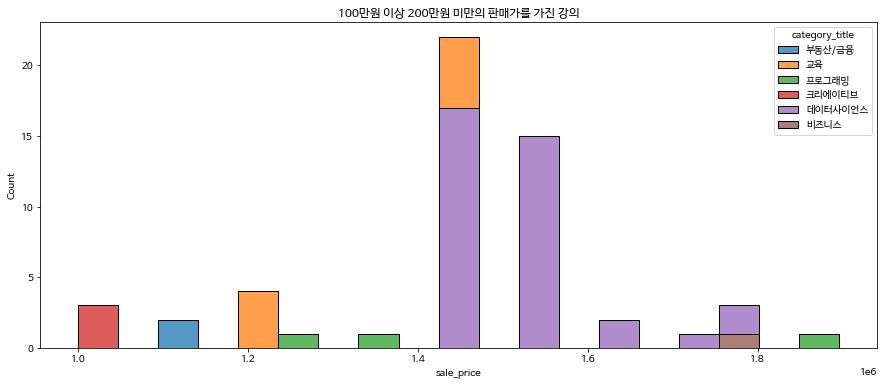

In [ ]:
high_price = df[df.sale_price>=1000000.0][df.sale_price<2000000.0]#판매가격이 100만원 이상 150만원 미만
plt.figure(figsize=(15,6))
plt.title("100만원 이상 200만원 미만의 판매가를 가진 강의")
sns.histplot(data=high_price, x='sale_price', hue='category_title', multiple='stack')
plt.show()

In [ ]:
very_high_price = df[df.sale_price>=2000000]
very_high_price #200만원 이상 가격이 높은 상품은 대부분 B2B로 판매되었음을 확인

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2601,977618,480736.0,204560.0,ORDER,CANCELLED,(B2B) 이노비즈협회 경영혁신 마일리지 제도 온라인 구독 (2021년 03월 2차),교육,B2B 온라인,2021-03-30 17:30:10,2100000,사용안함,0.0,2100000.0,2100000.0,ETC,CARD,해당없음,NaT
2607,977628,480736.0,204560.0,PAYMENT,COMPLETED,(B2B) 이노비즈협회 경영혁신 마일리지 제도 온라인 구독 (2021년 03월 2차),교육,B2B 온라인,2021-03-30 17:32:34,2100000,사용안함,0.0,2100000.0,2100000.0,ETC,CARD,해당없음,NaT
5427,985601,140373.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-01 16:55:34,-4144074,사용안함,0.0,6700000.0,6700000.0,ETC,CARD,해당없음,NaT
9128,996812,87093.0,203694.0,REFUND,COMPLETED,UX/UI 디자인 스쿨 16기,크리에이티브,스쿨,2021-04-07 18:20:58,-71666,사용안함,0.0,4100000.0,4100000.0,ETC,CARD,해당없음,2020-12-02
12675,1008277,412486.0,203694.0,REFUND,COMPLETED,UX/UI 디자인 스쿨 16기,크리에이티브,스쿨,2021-04-13 13:37:21,-1495000,사용안함,0.0,4100000.0,4100000.0,ETC,CARD,해당없음,2020-12-02
20833,1033885,388238.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-27 17:54:49,-3193827,사용안함,0.0,6700000.0,6700000.0,ETC,CARD,해당없음,NaT
26968,1050619,88316.0,204735.0,ORDER,CANCELLED,(B2B) 유엘코리아 온라인 구독 싱글 플랜,교육,B2B 온라인,2021-05-03 14:18:35,4532545,사용안함,0.0,4532545.0,4532545.0,INICIS,CARD,해당없음,NaT
27025,1050768,517679.0,204425.0,ORDER,CANCELLED,(B2B) 국민카드 : 로그 데이터 기반 그로스해킹 CAMP,마케팅,B2B,2021-05-03 16:22:44,9923200,사용안함,0.0,9923200.0,9923200.0,INICIS,CARD,해당없음,NaT
27321,1051716,282430.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-05-04 10:11:16,-2512593,사용안함,0.0,6600000.0,6600000.0,ETC,CARD,해당없음,NaT
27460,1052223,518603.0,204425.0,ORDER,CANCELLED,(B2B) 국민카드 : 로그 데이터 기반 그로스해킹 CAMP,마케팅,B2B,2021-05-04 15:51:12,9923200,사용안함,0.0,9923200.0,9923200.0,INICIS,CARD,해당없음,NaT
